In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test_1.csv')
pd.set_option('display.max_columns', None)

In [3]:
df_train.head()

,Unnamed: 0,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,7957,North East,Assam,Rural,Guwhati,Personal,Household,AC,0,1,2,0,0,0,4474.0,12,202,Manufacturer,30.0,Claim,0
1,1396,East,Delhi,Urban,New Delhi,Personal,Entertainment,TV,0,0,0,1,1,1,25000.0,13,60,Dealer,1.3,Complaint,0
2,7582,West,Andhra Pradesh,Rural,Hyderabad,Business,Household,AC,0,0,0,0,0,0,10000.0,12,3,Dealer,2.5,Claim,0
3,5824,West,Gujarat,Rural,Ahmedabad,Personal,Entertainment,TV,0,0,0,1,1,0,4216.0,10,672,Dealer,25.0,Other,0
4,4086,South West,Kerala,Rural,Kochi,Business,Household,AC,0,0,0,0,0,0,20000.0,13,3,Manufacturer,6.5,Claim,0


In [4]:
df_test.head()

,Unnamed: 0,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose
0,775,South West,Andhra Pradesh,Urban,Hyderabad,Business,Entertainment,TV,0,0,0,1,1,1,10000.0,13,5,Dealer,2.6,Claim
1,3130,South West,Andhra Pradesh,Urban,Hyderabad,Business,Entertainment,TV,0,0,0,1,1,1,20000.0,13,14,Manufacturer,1.4,Claim
2,93341,West,Gujarat,Rural,Ahmedabad,Business,Entertainment,TV,0,0,0,1,1,1,NaN,11,408,Dealer,30.0,Claim
3,9498,North East,Uttar Pradesh,Urban,Lucknow,Business,Household,AC,1,0,0,0,0,0,2000.0,10,148,Manufacturer,24.0,Claim
4,78191,North East,Uttar Pradesh,Urban,Lucknow,Personal,Entertainment,TV,0,0,0,0,0,0,0.0,10,125,Internet,1.0,Complaint


In [5]:
df_train.drop('Unnamed: 0', axis=1, inplace=True)
df_test.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8341 entries, 0 to 8340
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Region            8341 non-null   object 
 1   State             8341 non-null   object 
 2   Area              8341 non-null   object 
 3   City              8341 non-null   object 
 4   Consumer_profile  8341 non-null   object 
 5   Product_category  8341 non-null   object 
 6   Product_type      8341 non-null   object 
 7   AC_1001_Issue     8341 non-null   int64  
 8   AC_1002_Issue     8341 non-null   int64  
 9   AC_1003_Issue     8341 non-null   int64  
 10  TV_2001_Issue     8341 non-null   int64  
 11  TV_2002_Issue     8341 non-null   int64  
 12  TV_2003_Issue     8341 non-null   int64  
 13  Claim_Value       8101 non-null   float64
 14  Service_Centre    8341 non-null   int64  
 15  Product_Age       8341 non-null   int64  
 16  Purchased_from    8341 non-null   object 


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Region            3576 non-null   object 
 1   State             3576 non-null   object 
 2   Area              3576 non-null   object 
 3   City              3576 non-null   object 
 4   Consumer_profile  3576 non-null   object 
 5   Product_category  3576 non-null   object 
 6   Product_type      3576 non-null   object 
 7   AC_1001_Issue     3576 non-null   int64  
 8   AC_1002_Issue     3576 non-null   int64  
 9   AC_1003_Issue     3576 non-null   int64  
 10  TV_2001_Issue     3576 non-null   int64  
 11  TV_2002_Issue     3576 non-null   int64  
 12  TV_2003_Issue     3576 non-null   int64  
 13  Claim_Value       3483 non-null   float64
 14  Service_Centre    3576 non-null   int64  
 15  Product_Age       3576 non-null   int64  
 16  Purchased_from    3576 non-null   object 


In [8]:
print(df_train.shape)
print(df_test.shape)

(8341, 20)
(3576, 19)


In [9]:
print(df_train.isnull().sum())

Region                0
State                 0
Area                  0
City                  0
Consumer_profile      0
Product_category      0
Product_type          0
AC_1001_Issue         0
AC_1002_Issue         0
AC_1003_Issue         0
TV_2001_Issue         0
TV_2002_Issue         0
TV_2003_Issue         0
Claim_Value         240
Service_Centre        0
Product_Age           0
Purchased_from        0
Call_details          0
Purpose               0
Fraud                 0
dtype: int64


In [10]:
print(df_test.isnull().sum())

Region               0
State                0
Area                 0
City                 0
Consumer_profile     0
Product_category     0
Product_type         0
AC_1001_Issue        0
AC_1002_Issue        0
AC_1003_Issue        0
TV_2001_Issue        0
TV_2002_Issue        0
TV_2003_Issue        0
Claim_Value         93
Service_Centre       0
Product_Age          0
Purchased_from       0
Call_details         0
Purpose              0
dtype: int64


In [11]:
df_train.describe()

,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Call_details,Fraud
count,8341.000000,8341.000000,8341.000000,8341.000000,8341.000000,8341.000000,8101.000000,8341.000000,8341.000000,8341.000000,8341.000000
mean,0.268913,0.300563,0.190025,0.354274,0.433042,0.296247,14051.151586,12.832154,168.595013,10.709076,0.079847
std,0.572955,0.587182,0.500576,0.587451,0.639980,0.546295,13200.318156,1.724802,237.713181,11.610211,0.271072
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,3.000000,0.500000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4862.000000,12.000000,10.000000,1.500000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10000.000000,13.000000,21.000000,2.600000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,20000.000000,14.000000,284.000000,22.000000,0.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,50000.000000,16.000000,991.000000,30.000000,1.000000


In [12]:
df_test.describe()

,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Call_details
count,3576.000000,3576.000000,3576.000000,3576.000000,3576.000000,3576.000000,3483.000000,3576.000000,3576.000000,3576.000000
mean,0.263143,0.301174,0.184284,0.337808,0.427293,0.284116,14709.682171,12.832774,155.949385,10.203803
std,0.557061,0.583847,0.485181,0.571081,0.652289,0.543323,13816.391255,1.745804,227.128165,11.393538
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,3.000000,0.500000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5000.000000,12.000000,10.000000,1.400000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10000.000000,13.000000,21.000000,2.600000
75%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,20000.000000,14.000000,274.000000,21.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,50000.000000,16.000000,991.000000,30.000000


In [13]:
df_train.columns

Index(['Region', 'State', 'Area', 'City', 'Consumer_profile',
       'Product_category', 'Product_type', 'AC_1001_Issue', 'AC_1002_Issue',
       'AC_1003_Issue', 'TV_2001_Issue', 'TV_2002_Issue', 'TV_2003_Issue',
       'Claim_Value', 'Service_Centre', 'Product_Age', 'Purchased_from',
       'Call_details', 'Purpose', 'Fraud'],
      dtype='object')

In [14]:
cols_train = ['Region', 'State', 'Area', 'City', 'Consumer_profile',
       'Product_category', 'Product_type', 'AC_1001_Issue', 'AC_1002_Issue',
       'AC_1003_Issue', 'TV_2001_Issue', 'TV_2002_Issue', 'TV_2003_Issue',
       'Claim_Value', 'Service_Centre', 'Product_Age', 'Purchased_from',
       'Call_details', 'Purpose']

In [15]:
for col in cols_train:
    sep = df_train[col].unique().tolist()
    print(f"{col}:")
    print(sep)
    print()
    print("--"*30)

Region:
['North East', 'East', 'West', 'South West', 'South East', 'South', 'North', 'North West']

------------------------------------------------------------
State:
['Assam', 'Delhi', 'Andhra Pradesh', 'Gujarat', 'Kerala', 'West Bengal', 'Maharshtra', 'Karnataka', 'Uttar Pradesh', 'Telengana', 'Tamilnadu', 'UP', 'Goa', 'Bihar', 'Odisha', 'Rajasthan', 'MP', 'Tripura', 'HP', 'Jharkhand', 'Haryana', 'J&K']

------------------------------------------------------------
Area:
['Rural', 'Urban']

------------------------------------------------------------
City:
['Guwhati', 'New Delhi', 'Hyderabad', 'Ahmedabad', 'Kochi', 'Kolkata', 'Pune', 'Bangalore', 'Lucknow', 'Delhi', 'Chennai', 'Mumbai', 'Meerut', 'Panaji', 'Vizag', 'Patna', 'Bhubaneswar', 'Purnea', 'Vijayawada', 'Vadodara', 'Jaipur', 'Bhopal', 'Agartala', 'Shimla', 'Ranchi', 'Chandigarh', 'Srinagar']

------------------------------------------------------------
Consumer_profile:
['Personal', 'Business']

-----------------------------

In [16]:
for col in cols_train:
    sep = df_test[col].unique().tolist()
    print(f"{col}:")
    print(sep)
    print()
    print("--"*30)

Region:
['South West', 'West', 'North East', 'North', 'East', 'South', 'South East', 'North West']

------------------------------------------------------------
State:
['Andhra Pradesh', 'Gujarat', 'Uttar Pradesh', 'J&K', 'Bihar', 'West Bengal', 'Kerala', 'Maharshtra', 'Karnataka', 'Odisha', 'Delhi', 'Tamilnadu', 'Tripura', 'UP', 'Telengana', 'Assam', 'Goa', 'Jharkhand', 'MP', 'HP', 'Haryana', 'Rajasthan']

------------------------------------------------------------
Area:
['Urban', 'Rural']

------------------------------------------------------------
City:
['Hyderabad', 'Ahmedabad', 'Lucknow', 'Srinagar', 'Purnea', 'Kolkata', 'Vijayawada', 'Kochi', 'Pune', 'Bangalore', 'Bhubaneswar', 'New Delhi', 'Vadodara', 'Chennai', 'Agartala', 'Meerut', 'Mumbai', 'Vizag', 'Guwhati', 'Panaji', 'Patna', 'Ranchi', 'Bhopal', 'Shimla', 'Chandigarh', 'Jaipur', 'Delhi']

------------------------------------------------------------
Consumer_profile:
['Business', 'Personal']

-----------------------------

In [17]:
df_train['State'].replace('UP', 'Uttar Pradesh', inplace=True)
df_test['State'].replace('UP', 'Uttar Pradesh', inplace=True)

In [18]:
df_train['Purpose'].replace('claim', 'Claim', inplace=True)
df_test['Purpose'].replace('claim', 'Claim', inplace=True)

In [19]:
print(df_train['State'].value_counts())

State
Andhra Pradesh    1216
Tamilnadu         1020
Maharshtra         871
Gujarat            748
Kerala             730
Karnataka          708
Delhi              627
Bihar              578
Uttar Pradesh      381
West Bengal        352
Odisha             312
Telengana          188
Goa                169
Tripura             99
Assam               79
Jharkhand           74
Rajasthan           53
HP                  53
MP                  43
Haryana             29
J&K                 11
Name: count, dtype: int64


In [20]:
print(df_train['Purpose'].value_counts())

Purpose
Claim        3927
Complaint    3527
Other         887
Name: count, dtype: int64


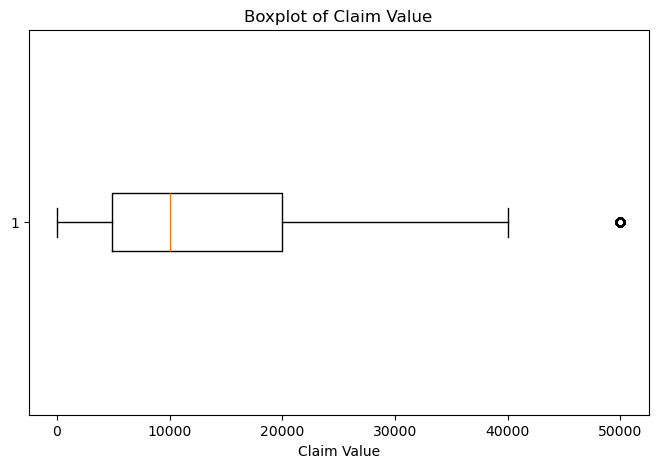

In [21]:
plt.figure(figsize=(8,5))
plt.boxplot(df_train['Claim_Value'].dropna(), vert=False)
plt.title('Boxplot of Claim Value')
plt.xlabel('Claim Value')
plt.show()

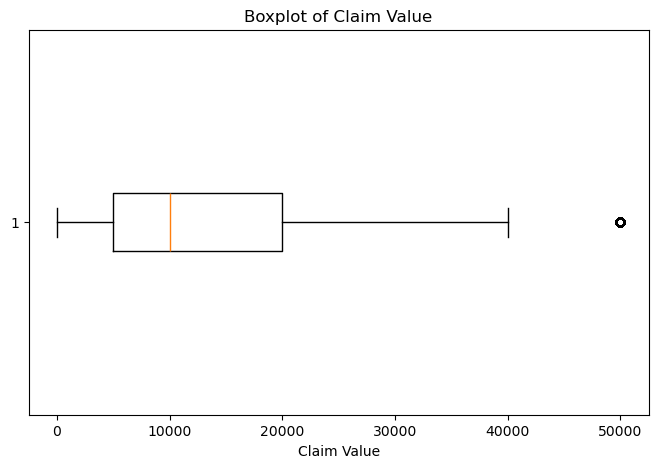

In [22]:
plt.figure(figsize=(8,5))
plt.boxplot(df_test['Claim_Value'].dropna(), vert=False)
plt.title('Boxplot of Claim Value')
plt.xlabel('Claim Value')
plt.show()

In [23]:
df_train.fillna(df_train['Claim_Value'].median(), inplace=True)
df_test.fillna(df_test['Claim_Value'].median(), inplace=True)

In [24]:
print(df_train.isnull().sum())
print()
print(df_test.isnull().sum())

Region              0
State               0
Area                0
City                0
Consumer_profile    0
Product_category    0
Product_type        0
AC_1001_Issue       0
AC_1002_Issue       0
AC_1003_Issue       0
TV_2001_Issue       0
TV_2002_Issue       0
TV_2003_Issue       0
Claim_Value         0
Service_Centre      0
Product_Age         0
Purchased_from      0
Call_details        0
Purpose             0
Fraud               0
dtype: int64

Region              0
State               0
Area                0
City                0
Consumer_profile    0
Product_category    0
Product_type        0
AC_1001_Issue       0
AC_1002_Issue       0
AC_1003_Issue       0
TV_2001_Issue       0
TV_2002_Issue       0
TV_2003_Issue       0
Claim_Value         0
Service_Centre      0
Product_Age         0
Purchased_from      0
Call_details        0
Purpose             0
dtype: int64


In [25]:
print(df_train['Fraud'].value_counts())

Fraud
0    7675
1     666
Name: count, dtype: int64


In [26]:
df_train['data'] = 'train'
df_test['Fraud'] = 0
df_test['data'] = 'test'

In [27]:
df_train.head()

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud,data
0,North East,Assam,Rural,Guwhati,Personal,Household,AC,0,1,2,0,0,0,4474.0,12,202,Manufacturer,30.0,Claim,0,train
1,East,Delhi,Urban,New Delhi,Personal,Entertainment,TV,0,0,0,1,1,1,25000.0,13,60,Dealer,1.3,Complaint,0,train
2,West,Andhra Pradesh,Rural,Hyderabad,Business,Household,AC,0,0,0,0,0,0,10000.0,12,3,Dealer,2.5,Claim,0,train
3,West,Gujarat,Rural,Ahmedabad,Personal,Entertainment,TV,0,0,0,1,1,0,4216.0,10,672,Dealer,25.0,Other,0,train
4,South West,Kerala,Rural,Kochi,Business,Household,AC,0,0,0,0,0,0,20000.0,13,3,Manufacturer,6.5,Claim,0,train


In [28]:
df_test.head()

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud,data
0,South West,Andhra Pradesh,Urban,Hyderabad,Business,Entertainment,TV,0,0,0,1,1,1,10000.0,13,5,Dealer,2.6,Claim,0,test
1,South West,Andhra Pradesh,Urban,Hyderabad,Business,Entertainment,TV,0,0,0,1,1,1,20000.0,13,14,Manufacturer,1.4,Claim,0,test
2,West,Gujarat,Rural,Ahmedabad,Business,Entertainment,TV,0,0,0,1,1,1,10000.0,11,408,Dealer,30.0,Claim,0,test
3,North East,Uttar Pradesh,Urban,Lucknow,Business,Household,AC,1,0,0,0,0,0,2000.0,10,148,Manufacturer,24.0,Claim,0,test
4,North East,Uttar Pradesh,Urban,Lucknow,Personal,Entertainment,TV,0,0,0,0,0,0,0.0,10,125,Internet,1.0,Complaint,0,test


In [29]:
full_table = pd.concat([df_train, df_test], ignore_index=True)

In [30]:
full_table.head()

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud,data
0,North East,Assam,Rural,Guwhati,Personal,Household,AC,0,1,2,0,0,0,4474.0,12,202,Manufacturer,30.0,Claim,0,train
1,East,Delhi,Urban,New Delhi,Personal,Entertainment,TV,0,0,0,1,1,1,25000.0,13,60,Dealer,1.3,Complaint,0,train
2,West,Andhra Pradesh,Rural,Hyderabad,Business,Household,AC,0,0,0,0,0,0,10000.0,12,3,Dealer,2.5,Claim,0,train
3,West,Gujarat,Rural,Ahmedabad,Personal,Entertainment,TV,0,0,0,1,1,0,4216.0,10,672,Dealer,25.0,Other,0,train
4,South West,Kerala,Rural,Kochi,Business,Household,AC,0,0,0,0,0,0,20000.0,13,3,Manufacturer,6.5,Claim,0,train


In [31]:
full_table.isnull().sum()

Region              0
State               0
Area                0
City                0
Consumer_profile    0
Product_category    0
Product_type        0
AC_1001_Issue       0
AC_1002_Issue       0
AC_1003_Issue       0
TV_2001_Issue       0
TV_2002_Issue       0
TV_2003_Issue       0
Claim_Value         0
Service_Centre      0
Product_Age         0
Purchased_from      0
Call_details        0
Purpose             0
Fraud               0
data                0
dtype: int64

In [32]:
full_table['Total_AC_Issues'] = full_table['AC_1001_Issue']+ full_table['AC_1002_Issue']+ full_table['AC_1003_Issue']

In [33]:
full_table['Total_TV_Issues'] = full_table['TV_2001_Issue']+ full_table['TV_2002_Issue']+ full_table['TV_2003_Issue']

In [34]:
full_table.drop(['AC_1001_Issue','AC_1002_Issue','AC_1003_Issue'], axis=1, inplace=True)

In [35]:
full_table.drop(['TV_2001_Issue','TV_2002_Issue','TV_2003_Issue'], axis=1, inplace=True)

In [36]:
full_table.head()

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud,data,Total_AC_Issues,Total_TV_Issues
0,North East,Assam,Rural,Guwhati,Personal,Household,AC,4474.0,12,202,Manufacturer,30.0,Claim,0,train,3,0
1,East,Delhi,Urban,New Delhi,Personal,Entertainment,TV,25000.0,13,60,Dealer,1.3,Complaint,0,train,0,3
2,West,Andhra Pradesh,Rural,Hyderabad,Business,Household,AC,10000.0,12,3,Dealer,2.5,Claim,0,train,0,0
3,West,Gujarat,Rural,Ahmedabad,Personal,Entertainment,TV,4216.0,10,672,Dealer,25.0,Other,0,train,0,2
4,South West,Kerala,Rural,Kochi,Business,Household,AC,20000.0,13,3,Manufacturer,6.5,Claim,0,train,0,0


In [37]:
full_table['Fraud'].value_counts(normalize=True)

Fraud
0    0.944113
1    0.055887
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Claim Value vs Fraud')

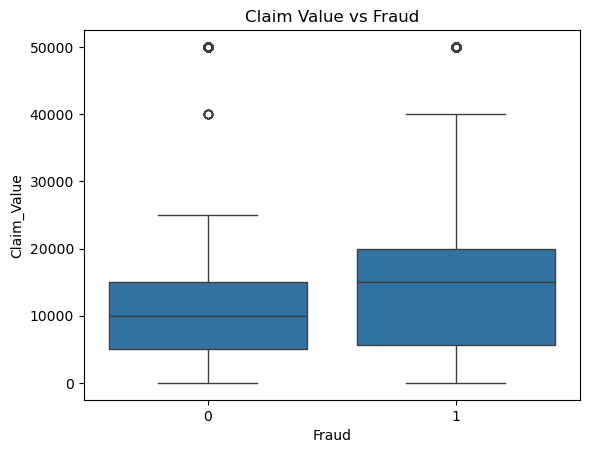

In [38]:
sns.boxplot(x='Fraud', y='Claim_Value', data=full_table)
plt.title('Claim Value vs Fraud')

In [39]:
pd.crosstab(full_table['Product_type'], full_table['Fraud'], normalize='index')

pd.crosstab(full_table['Purchased_from'], full_table['Fraud'], normalize='index')

Fraud,0,1
Purchased_from,,
Dealer,0.981996,0.018004
Internet,0.992778,0.007222
Manufacturer,0.870072,0.129928


<Axes: >

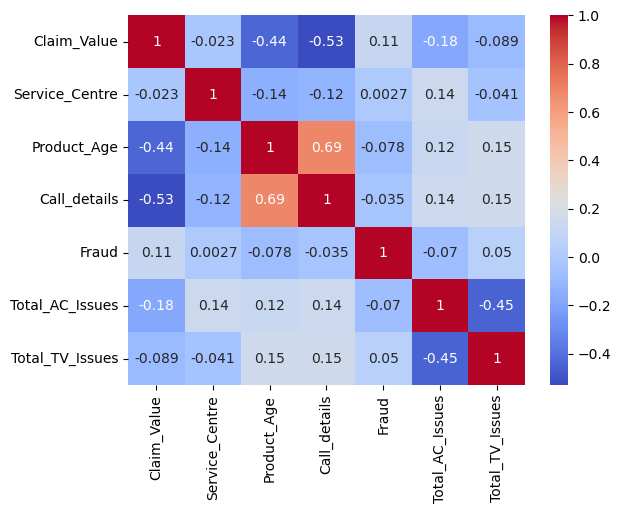

In [40]:
corr = full_table.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [41]:
full_table.groupby('Fraud')['Claim_Value'].mean()

Fraud
0    13765.340059
1    20297.839339
Name: Claim_Value, dtype: float64

In [42]:
full_table[['Call_details', 'Product_Age', 'Fraud']].corr()

,Call_details,Product_Age,Fraud
Call_details,1.000000,0.687700,-0.035312
Product_Age,0.687700,1.000000,-0.077539
Fraud,-0.035312,-0.077539,1.000000


In [43]:
full_table.drop(columns=['Call_details'], inplace=True)

In [44]:
train_clean = full_table[full_table['data']=='train']
train_clean.drop('data', inplace=True, axis=1)

In [45]:
test_clean = full_table[full_table['data']=='test']
test_clean.drop(['data','Fraud'], inplace=True, axis=1)

In [46]:
train_clean = pd.get_dummies(train_clean, drop_first=True).astype(int)
test_clean = pd.get_dummies(test_clean, drop_first=True).astype(int)

In [47]:
unseen_test_data = test_clean.copy()

In [48]:
train_clean['Fraud'].value_counts()

Fraud
0    7675
1     666
Name: count, dtype: int64

In [49]:
X = train_clean.drop(columns=['Fraud'])
y = train_clean['Fraud']

In [50]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.2, random_state=42)

In [52]:
smote = SMOTE(random_state=42)

In [53]:
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [54]:
y_train_balanced.value_counts()

Fraud
0    6139
1    6139
Name: count, dtype: int64

In [55]:
y_test.value_counts()

Fraud
0    1536
1     133
Name: count, dtype: int64

In [56]:
# Building models

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [58]:
# LogisticRegression
logit = LogisticRegression()
logit = logit.fit(X_train_balanced, y_train_balanced)
y_pred_lr = logit.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# RandomForest
rforest = RandomForestClassifier()
rforest = rforest.fit(X_train_balanced, y_train_balanced)
y_pred_rf = rforest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# XGBoost
xgboost = XGBClassifier()
xgboost = xgboost.fit(X_train_balanced, y_train_balanced)
y_pred_xg = xgboost.predict(X_test)
accuracy_xg = accuracy_score(y_test, y_pred_xg)

# KNN
knn = KNeighborsClassifier()
knn = knn.fit(X_train_balanced, y_train_balanced)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# SVM
svm = SVC()
svm = svm.fit(X_train_balanced, y_train_balanced)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

In [59]:
list1 = ['LogisticRegression', 'RForest', 'XGB', 'KNN', 'SVC']
list2 = [accuracy_lr, accuracy_rf, accuracy_xg, accuracy_knn, accuracy_knn]
list3 =  [logit, rforest, xgboost, knn, svm]

df_accuracy = pd.DataFrame({"Model Used":list1, "Accuracy":list2})
print(df_accuracy)

           Model Used  Accuracy
0  LogisticRegression  0.748352
1             RForest  0.957460
2                 XGB  0.957460
3                 KNN  0.961654
4                 SVC  0.961654


Axes(0.125,0.11;0.775x0.77)


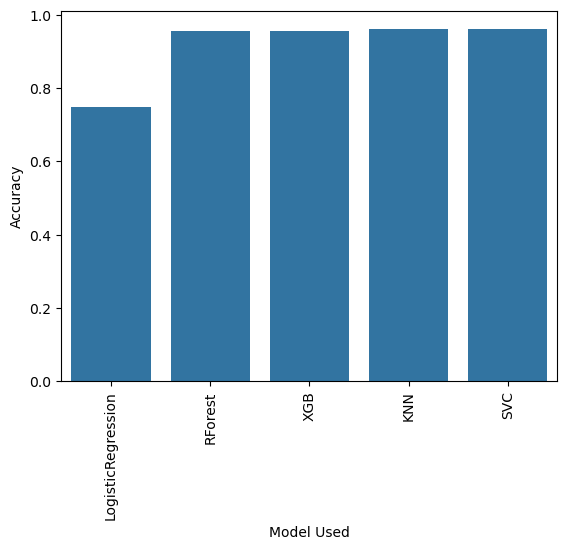

In [60]:
chart = sns.barplot(x="Model Used", y="Accuracy", data=df_accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)

In [61]:
pred_knn_train = knn.predict(X_train_balanced)
pred_knn_test = knn.predict(X_test)
accuracy_knn_train = accuracy_score(y_train_balanced, pred_knn_train)
accuracy_knn_test = accuracy_score(y_test, pred_knn_test)

print("************************")
print("Training Accuracy :",accuracy_knn_train)
print("************************")
print("Testing Accuracy :",accuracy_knn_test)

************************
Training Accuracy : 0.9678286365857631
************************
Testing Accuracy : 0.9616536848412223


# Cross validation

In [62]:
from sklearn.model_selection import cross_val_score
training = cross_val_score(knn, X_train_balanced, y_train_balanced, cv=10)
print("Training Accuracy :", training.mean())
print("*"*40)
print("Training Accuracy :", accuracy_knn_test)

Training Accuracy : 0.966850969898245
****************************************
Training Accuracy : 0.9616536848412223


In [63]:
training

array([0.96742671, 0.96824104, 0.9747557 , 0.96416938, 0.96416938,
       0.96416938, 0.98045603, 0.95521173, 0.96495518, 0.96495518])

In [64]:
print("*"*40)
print("Training Accuracy :\n",classification_report(y_train_balanced, pred_knn_train))
print("*"*40)
print("Testing Accuracy :\n",classification_report(y_test, pred_knn_test))

****************************************
Training Accuracy :
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      6139
           1       0.96      0.98      0.97      6139

    accuracy                           0.97     12278
   macro avg       0.97      0.97      0.97     12278
weighted avg       0.97      0.97      0.97     12278

****************************************
Testing Accuracy :
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      1536
           1       0.68      0.97      0.80       133

    accuracy                           0.96      1669
   macro avg       0.84      0.97      0.89      1669
weighted avg       0.97      0.96      0.96      1669



In [65]:
print("*********** Training *************")
print(confusion_matrix(y_train_balanced, pred_knn_train))
print("***********  Training  *************")
print(confusion_matrix(y_test, pred_knn_test))

*********** Training *************
[[5880  259]
 [ 136 6003]]
***********  Training  *************
[[1476   60]
 [   4  129]]


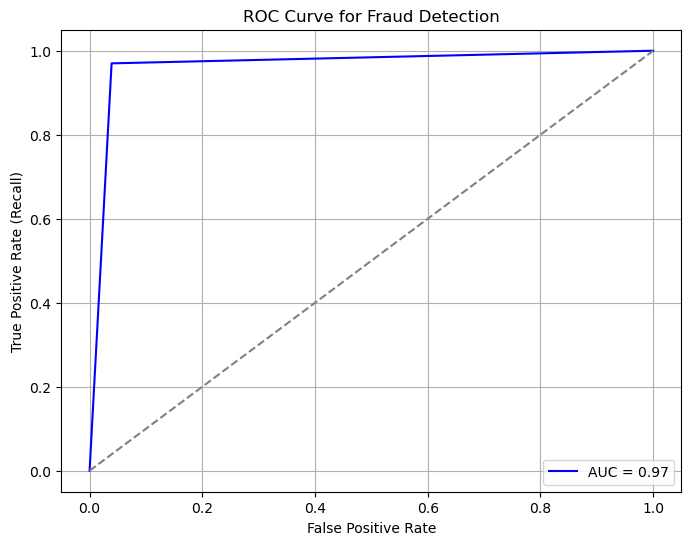

In [95]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)
auc_score = roc_auc_score(y_test, y_pred_knn)

# Step 2: Plot
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve for Fraud Detection')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Final Model

In [66]:
final_output = knn.predict(unseen_test_data)

In [67]:
final_output

array([0, 1, 0, ..., 0, 0, 0])

In [68]:
final_output = pd.DataFrame(final_output)
final_output.columns

RangeIndex(start=0, stop=1, step=1)

In [69]:
unseen_test_data.shape

(3576, 66)

In [70]:
final_output.shape

(3576, 1)

In [73]:
final_output.to_csv("Final_Target_Value.csv")

In [74]:
final_output.value_counts()

0
0    3116
1     460
Name: count, dtype: int64

In [75]:
final_output.rename(columns={0: 'Fraud'}, inplace=True)

In [76]:
final_output.value_counts()

Fraud
0        3116
1         460
Name: count, dtype: int64

In [77]:
final_output['Fraud']

0       0
1       1
2       0
3       1
4       0
       ..
3571    0
3572    1
3573    0
3574    0
3575    0
Name: Fraud, Length: 3576, dtype: int64

In [78]:
unseen_test_data

,Claim_Value,Service_Centre,Product_Age,Total_AC_Issues,Total_TV_Issues,Region_North,Region_North East,Region_North West,Region_South,Region_South East,Region_South West,Region_West,State_Assam,State_Bihar,State_Delhi,State_Goa,State_Gujarat,State_HP,State_Haryana,State_J&K,State_Jharkhand,State_Karnataka,State_Kerala,State_MP,State_Maharshtra,State_Odisha,State_Rajasthan,State_Tamilnadu,State_Telengana,State_Tripura,State_Uttar Pradesh,State_West Bengal,Area_Urban,City_Ahmedabad,City_Bangalore,City_Bhopal,City_Bhubaneswar,City_Chandigarh,City_Chennai,City_Delhi,City_Guwhati,City_Hyderabad,City_Jaipur,City_Kochi,City_Kolkata,City_Lucknow,City_Meerut,City_Mumbai,City_New Delhi,City_Panaji,City_Patna,City_Pune,City_Purnea,City_Ranchi,City_Shimla,City_Srinagar,City_Vadodara,City_Vijayawada,City_Vizag,Consumer_profile_Personal,Product_category_Household,Product_type_TV,Purchased_from_Internet,Purchased_from_Manufacturer,Purpose_Complaint,Purpose_Other
8341,10000,13,5,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8342,20000,13,14,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
8343,10000,11,408,0,3,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8344,2000,10,148,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
8345,0,10,125,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11912,5584,11,111,3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1
11913,5618,14,289,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
11914,12000,14,12,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0
11915,25000,12,7,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [87]:
final_output_prediction = unseen_test_data.copy()

In [88]:
final_output_prediction.head(1)

,Claim_Value,Service_Centre,Product_Age,Total_AC_Issues,Total_TV_Issues,Region_North,Region_North East,Region_North West,Region_South,Region_South East,Region_South West,Region_West,State_Assam,State_Bihar,State_Delhi,State_Goa,State_Gujarat,State_HP,State_Haryana,State_J&K,State_Jharkhand,State_Karnataka,State_Kerala,State_MP,State_Maharshtra,State_Odisha,State_Rajasthan,State_Tamilnadu,State_Telengana,State_Tripura,State_Uttar Pradesh,State_West Bengal,Area_Urban,City_Ahmedabad,City_Bangalore,City_Bhopal,City_Bhubaneswar,City_Chandigarh,City_Chennai,City_Delhi,City_Guwhati,City_Hyderabad,City_Jaipur,City_Kochi,City_Kolkata,City_Lucknow,City_Meerut,City_Mumbai,City_New Delhi,City_Panaji,City_Patna,City_Pune,City_Purnea,City_Ranchi,City_Shimla,City_Srinagar,City_Vadodara,City_Vijayawada,City_Vizag,Consumer_profile_Personal,Product_category_Household,Product_type_TV,Purchased_from_Internet,Purchased_from_Manufacturer,Purpose_Complaint,Purpose_Other
8341,10000,13,5,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [89]:
final_output_prediction['Fraud'] = final_output['Fraud'].values

In [93]:
final_output_prediction

,Claim_Value,Service_Centre,Product_Age,Total_AC_Issues,Total_TV_Issues,Region_North,Region_North East,Region_North West,Region_South,Region_South East,Region_South West,Region_West,State_Assam,State_Bihar,State_Delhi,State_Goa,State_Gujarat,State_HP,State_Haryana,State_J&K,State_Jharkhand,State_Karnataka,State_Kerala,State_MP,State_Maharshtra,State_Odisha,State_Rajasthan,State_Tamilnadu,State_Telengana,State_Tripura,State_Uttar Pradesh,State_West Bengal,Area_Urban,City_Ahmedabad,City_Bangalore,City_Bhopal,City_Bhubaneswar,City_Chandigarh,City_Chennai,City_Delhi,City_Guwhati,City_Hyderabad,City_Jaipur,City_Kochi,City_Kolkata,City_Lucknow,City_Meerut,City_Mumbai,City_New Delhi,City_Panaji,City_Patna,City_Pune,City_Purnea,City_Ranchi,City_Shimla,City_Srinagar,City_Vadodara,City_Vijayawada,City_Vizag,Consumer_profile_Personal,Product_category_Household,Product_type_TV,Purchased_from_Internet,Purchased_from_Manufacturer,Purpose_Complaint,Purpose_Other,Fraud
8341,10000,13,5,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8342,20000,13,14,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
8343,10000,11,408,0,3,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8344,2000,10,148,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
8345,0,10,125,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11912,5584,11,111,3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0
11913,5618,14,289,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
11914,12000,14,12,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0
11915,25000,12,7,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [94]:
final_output_prediction.to_csv("Final_prediction.csv")

In [98]:
from sklearn.inspection import permutation_importance

result = permutation_importance(knn, X_test, y_test, n_repeats=10, random_state=42)

import pandas as pd
importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

print(importance_df)


                        Feature  Importance
0                   Claim_Value    0.140443
2                   Product_Age    0.106531
64            Purpose_Complaint    0.003355
1                Service_Centre    0.002996
63  Purchased_from_Manufacturer    0.002696
..                          ...         ...
60   Product_category_Household    0.000000
65                Purpose_Other    0.000000
61              Product_type_TV    0.000000
4               Total_TV_Issues   -0.003235
59    Consumer_profile_Personal   -0.006591

[66 rows x 2 columns]


In [99]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

rfe = RFE(estimator=LogisticRegression(), n_features_to_select=10)
rfe.fit(X_train_balanced, y_train_balanced)

selected_features = X_train_balanced.columns[rfe.support_]
print("Top features:", selected_features)

Top features: Index(['Region_North West', 'State_Telengana', 'State_Tripura',
       'City_Bhubaneswar', 'City_Delhi', 'City_Guwhati', 'City_Patna',
       'City_Vijayawada', 'City_Vizag', 'Purchased_from_Manufacturer'],
      dtype='object')


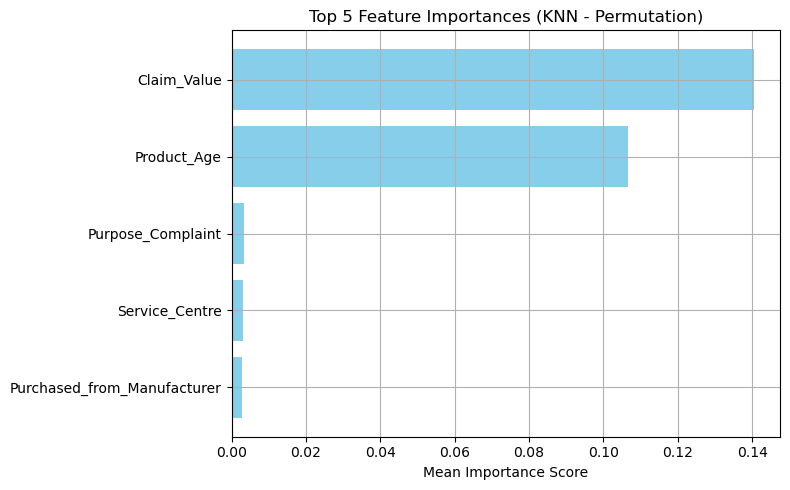

In [102]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt

result = permutation_importance(knn, X_test, y_test, n_repeats=10, random_state=42)

importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': result.importances_mean
})

top5 = importance_df.sort_values(by='Importance', ascending=False).head(5)

plt.figure(figsize=(8, 5))
plt.barh(top5['Feature'], top5['Importance'], color='skyblue')
plt.xlabel('Mean Importance Score')
plt.title('Top 5 Feature Importances (KNN - Permutation)')
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()
